### Utility Functions

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import numpy as np
import pickle

import matplotlib.pyplot as plt

In [ ]:
#function for grapsh
def create_graphs(train_acc, train_loss, train_error):
  epochs_lst =list(range(1,num_epochs+1))
  plt.plot(epochs_lst , train_acc,  label= "train", color= 'purple')
  plt.title("Accuracy Value per Epochs")
  plt.xlabel("Epoch")
  plt.ylabel("Accuracy")
  plt.legend()
  plt.show()

  plt.plot(epochs_lst,train_loss,color = '#b04238' , label= "train")
  plt.title("Loss Value per Epochs")
  plt.xlabel("Epoch")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

  plt.plot(epochs_lst,train_error  ,label= "train")
  plt.title("Error Value per Epochs")
  plt.xlabel("Epoch")
  plt.ylabel("Error")
  plt.legend()
  plt.show()

In [ ]:
def train_nn (cnn,train_loader, optimizer):
    train_count =[]
    train_loss=[]
    train_acc =[]
    train_error = []
    train_total =0
    train_correct = 0
    train_loss_tot = 0
    train_wrong = 0

    grad_clip = None

    for epoch in range(num_epochs):
            print(f'epoch num is: {epoch}')
            cnn.train()
            for i, (images, labels) in enumerate(train_loader):

                labels = labels.to(device)
                images = images.to(device)

                #forward step
                optimizer.zero_grad()
                outputs = cnn(images)
                _, predicted = torch.max(outputs.data, 1)
                train_total += labels.size(0)
                train_correct += (predicted == labels).sum().item()
                train_wrong +=(predicted != labels).sum().item()
                train_count.append(train_total)

                #loss
                loss = F.cross_entropy(outputs, labels)
                train_loss_tot+= loss.detach().numpy()

                #backward
                loss.backward()

                #gradient clipping
                if grad_clip:
                  nn.utils.clip_grad_value_(cnn.parameters(), grad_clip)

                #step
                optimizer.step()

                #if (i+1) % 200==0:
                #  print('Epoch [%d/%d], Iter [%d/%d] Loss: %.4f' %(epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss.data))


            train_loss.append(train_loss_tot/train_total)
            train_acc.append(train_correct/train_total)
            train_error.append (train_wrong/train_total)

    create_graphs(train_acc, train_loss, train_error)

In [ ]:
device= torch.device('cuda' if torch.cuda.is_available () else 'cpu')
print (device)

cpu


In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=12, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(12),
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=12, out_channels=16, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(16),
            nn.AvgPool2d(kernel_size=4, stride=2, padding=2)
        )
        self.layer3 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(32),
            nn.AvgPool2d(kernel_size=4, stride=2, padding=2),
        )
        self.layer4 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=4, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(kernel_size=4, stride=3, padding=2)
        )
        self.linear = nn.Linear(64 * 3 * 3, 10)
        self.dropout = nn.Dropout(p=0.3)
        self.logsoftmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)

        out = out.view(out.size(0), -1)
        out = self.dropout(out)
        out = self.linear(out)

        return self.logsoftmax(out)


### Train

In [ ]:
# Hyper Parameters
num_epochs = 45
batch_size = 400

# Image Preprocessing
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465),
                         (0.2023, 0.1994, 0.2010)),
])

train_dataset = dsets.CIFAR10(root='./data/',
                               train=True,
                               transform=transform,
                               download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data/


In [ ]:
cnn = CNN()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def train_model_q1():
  # Set up cutom optimizer with weight decay
  lr = 0.001
  weight_decay = 1e-4
  optimizer = torch.optim.Adam(cnn.parameters(), lr, weight_decay=weight_decay)

  print('number of parameters: ', sum(param.numel() for param in cnn.parameters()))
  train_nn(cnn, train_loader, optimizer)
  with open("train_hw2_206238891_CNN.pkl", "wb") as f:
     pickle.dump(cnn, f)


number of parameters:  49218
epoch num is: 0
epoch num is: 1
epoch num is: 2
epoch num is: 3
epoch num is: 4
epoch num is: 5
epoch num is: 6
epoch num is: 7
epoch num is: 8
epoch num is: 9
epoch num is: 10
epoch num is: 11
epoch num is: 12
epoch num is: 13
epoch num is: 14
epoch num is: 15
epoch num is: 16
epoch num is: 17
epoch num is: 18
epoch num is: 19
epoch num is: 20
epoch num is: 21
epoch num is: 22
epoch num is: 23
epoch num is: 24
epoch num is: 25
epoch num is: 26
epoch num is: 27
epoch num is: 28
epoch num is: 29
epoch num is: 30
epoch num is: 31
epoch num is: 32
epoch num is: 33
epoch num is: 34
epoch num is: 35
epoch num is: 36
epoch num is: 37
epoch num is: 38
epoch num is: 39
epoch num is: 40
epoch num is: 41
epoch num is: 42
epoch num is: 43
epoch num is: 44


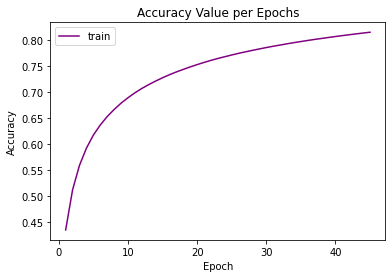

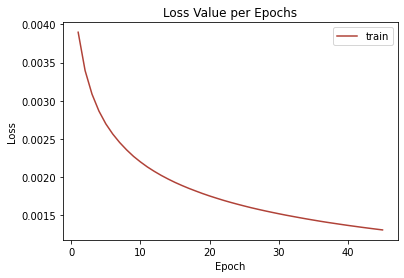

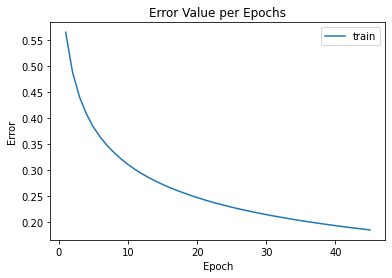

In [ ]:
train_model_q1()